<a href="https://colab.research.google.com/github/cmaguire001/instacart-feature-flag-analysis/blob/main/Instacart_Feature_Flag_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

orders = pd.read_csv('/content/orders.csv')
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
orders.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [4]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [5]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
# Count how many orders happen on each day of the week
orders_by_day = orders['order_dow'].value_counts().sort_index()

# Map numbers to weekdays for clarity
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

orders_by_day.index = orders_by_day.index.map(weekdays)

print(orders_by_day)



order_dow
Sunday       600905
Monday       587478
Tuesday      467260
Wednesday    436972
Thursday     426339
Friday       453368
Saturday     448761
Name: count, dtype: int64


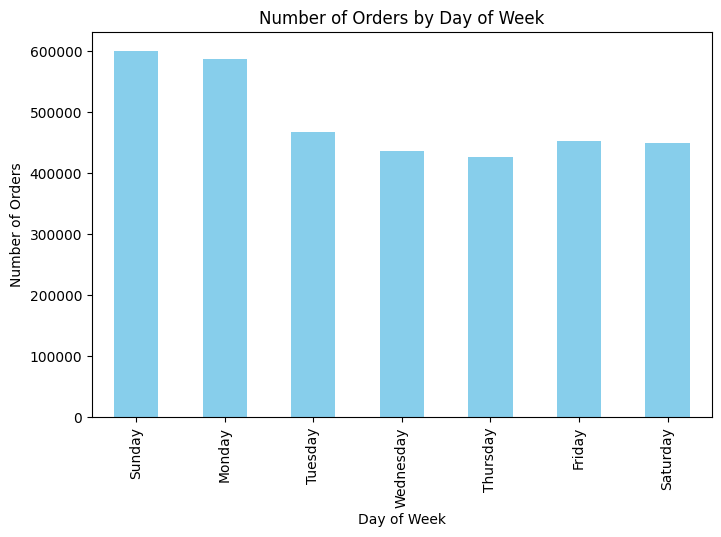

In [7]:
import matplotlib.pyplot as plt

orders_by_day.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Number of Orders by Day of Week')
plt.ylabel('Number of Orders')
plt.xlabel('Day of Week')
plt.show()


In [8]:
# Count orders by hour
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Print the result
print(orders_by_hour)


order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: count, dtype: int64


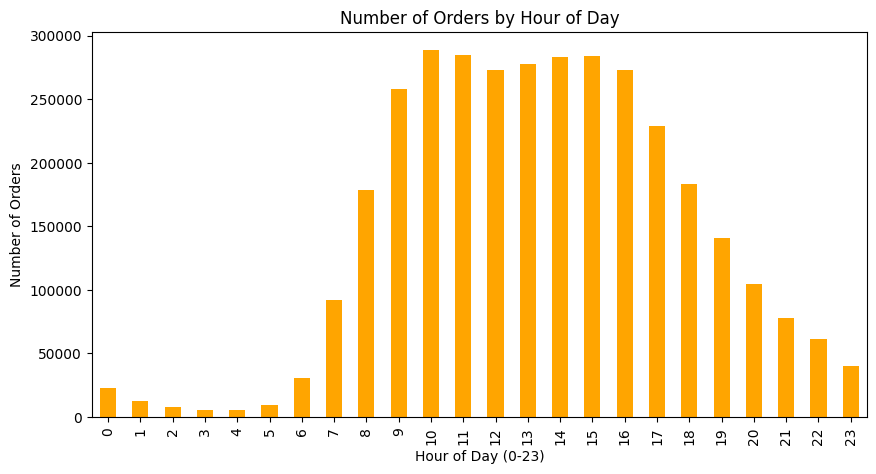

In [9]:
orders_by_hour.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.show()


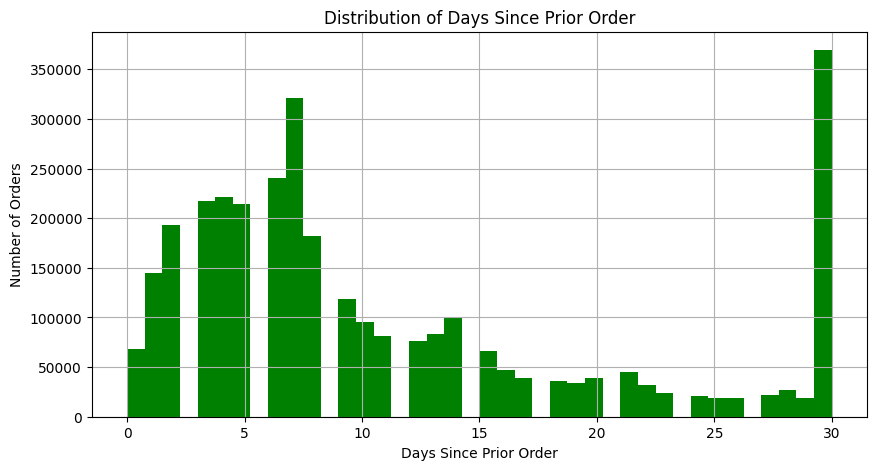

In [11]:
# Check distribution of days since prior order
import matplotlib.pyplot as plt

orders['days_since_prior_order'].hist(bins=40, color='green', figsize=(10,5))
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.show()


In [12]:
import numpy as np

# Get all unique users
users = orders['user_id'].unique()

# Randomly assign each user to control or treatment
np.random.seed(42)  # for reproducibility
user_flags = pd.DataFrame({
    'user_id': users,
    'feature_flag': np.random.choice(['control', 'treatment'], size=len(users))
})

user_flags.head()


,user_id,feature_flag
0,1,control
1,2,treatment
2,3,control
3,4,control
4,5,control


In [13]:
# Merge the feature flag assignment into the orders table
orders_flagged = orders.merge(user_flags, on='user_id', how='left')

orders_flagged.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,feature_flag
0,2539329,1,prior,1,2,8,NaN,control
1,2398795,1,prior,2,3,7,15.0,control
2,473747,1,prior,3,3,12,21.0,control
3,2254736,1,prior,4,4,7,29.0,control
4,431534,1,prior,5,4,15,28.0,control


In [14]:
# Calculate average days_since_prior_order for control vs treatment
avg_days = orders_flagged.groupby('feature_flag')['days_since_prior_order'].mean()
print(avg_days)


feature_flag
control      11.110758
treatment    11.118921
Name: days_since_prior_order, dtype: float64


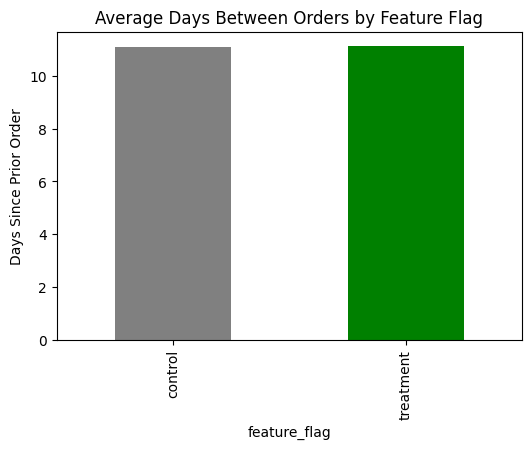

In [15]:
avg_days.plot(kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Days Since Prior Order')
plt.show()


In [16]:
# Group by feature flag
summary = orders_flagged.groupby('feature_flag').agg(
    total_orders=('order_id', 'count'),
    avg_days_between_orders=('days_since_prior_order', 'mean'),
    median_days_between_orders=('days_since_prior_order', 'median'),
    unique_users=('user_id', 'nunique')
).reset_index()

print(summary)


  feature_flag  total_orders  avg_days_between_orders  \
0      control       1711889                11.110758   
1    treatment       1709194                11.118921   

   median_days_between_orders  unique_users  
0                         7.0        103145  
1                         7.0        103064  


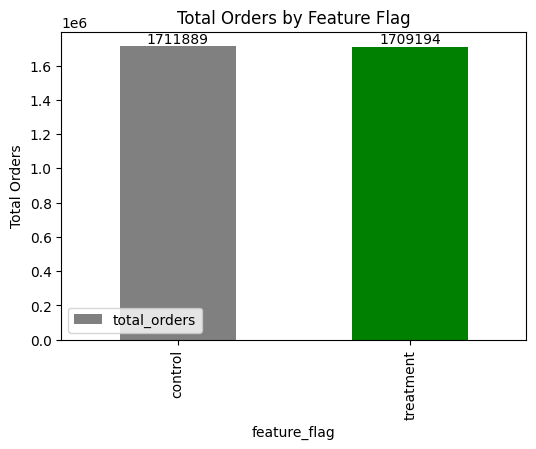

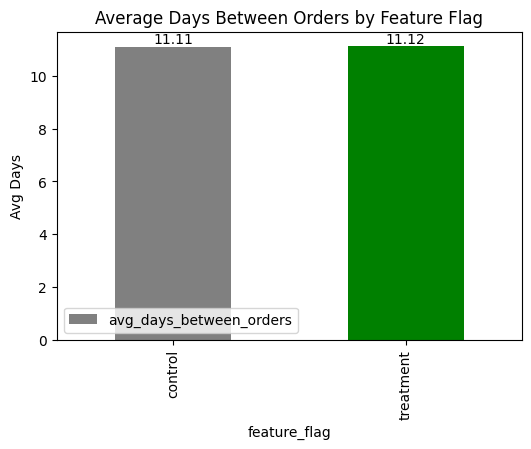

In [18]:
import matplotlib.pyplot as plt

# Bar plot for total orders
ax1 = summary.plot(x='feature_flag', y='total_orders', kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Total Orders by Feature Flag')
plt.ylabel('Total Orders')

# Add data labels to the first plot
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f')

plt.show()

# Bar plot for average days between orders
ax2 = summary.plot(x='feature_flag', y='avg_days_between_orders', kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Avg Days')

# Add data labels to the second plot
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f')

plt.show()

In [20]:
# Busiest day of week
orders_by_day = orders['order_dow'].value_counts().sort_index()
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
orders_by_day.index = orders_by_day.index.map(weekdays)

# Busiest hour of day
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Reorder frequency
avg_days_between_orders = orders['days_since_prior_order'].mean()
median_days_between_orders = orders['days_since_prior_order'].median()

# Feature flag experiment summary (from previous step)
experiment_summary = summary.copy()


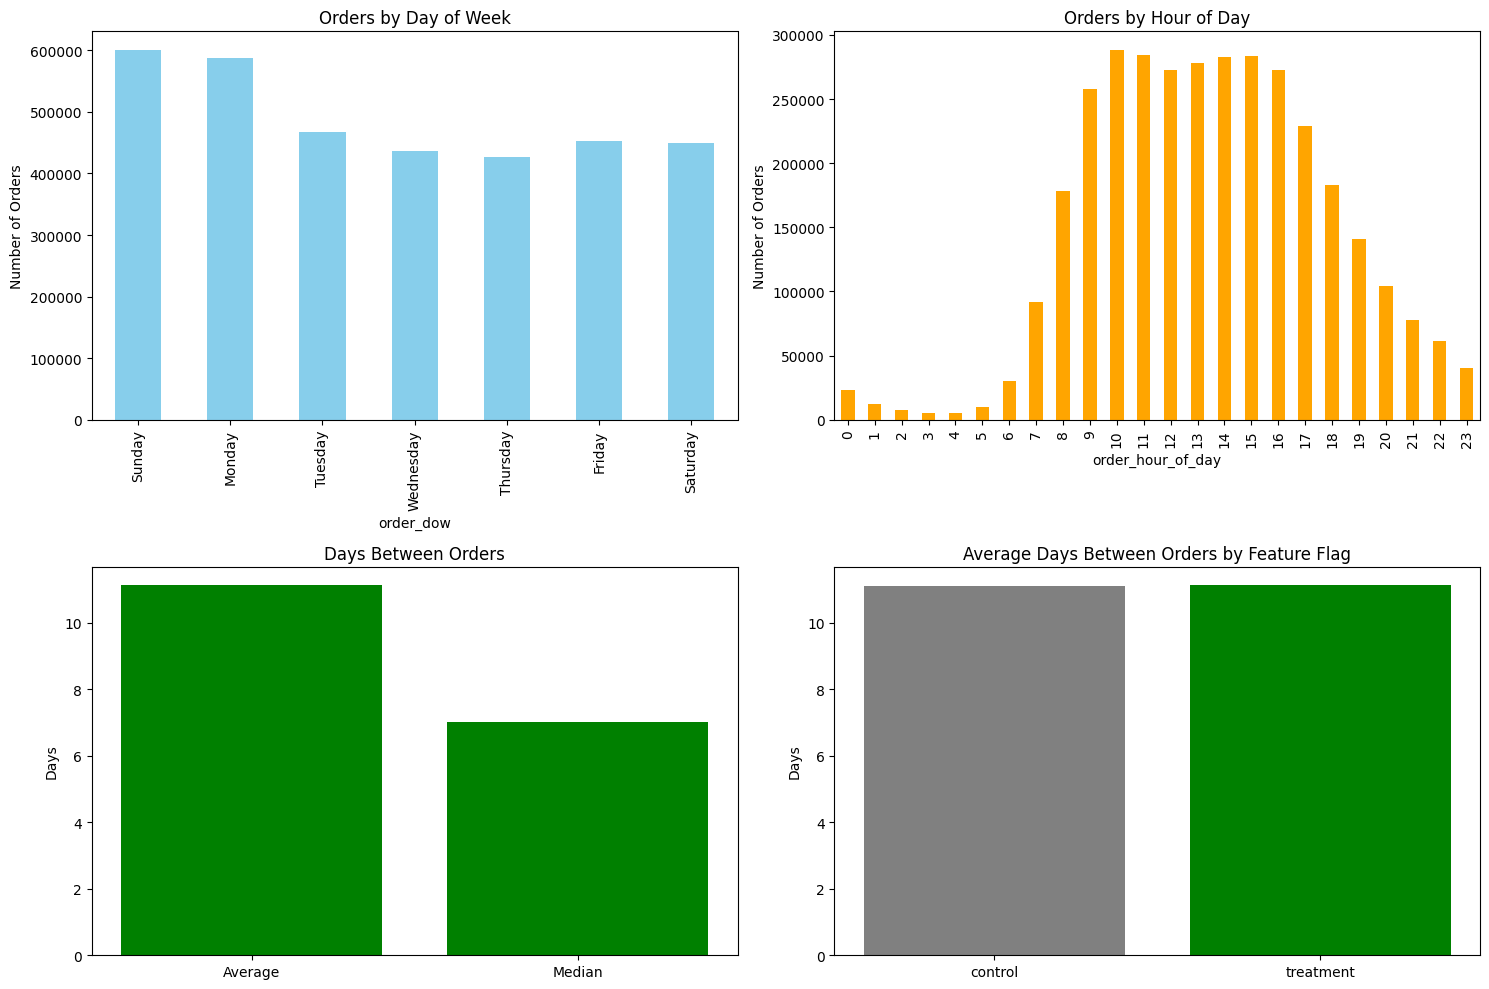

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Busiest day
plt.subplot(2,2,1)
orders_by_day.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of Week')
plt.ylabel('Number of Orders')

# Busiest hour
plt.subplot(2,2,2)
orders_by_hour.plot(kind='bar', color='orange')
plt.title('Orders by Hour of Day')
plt.ylabel('Number of Orders')

# Reorder frequency
plt.subplot(2,2,3)
plt.bar(['Average','Median'], [avg_days_between_orders, median_days_between_orders], color='green')
plt.title('Days Between Orders')
plt.ylabel('Days')

# Feature flag experiment
plt.subplot(2,2,4)
plt.bar(experiment_summary['feature_flag'], experiment_summary['avg_days_between_orders'], color=['gray','green'])
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Days')

plt.tight_layout()
plt.show()
